In [1]:
from utils import *

In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

import os
os.chdir("../../scVI/")
os.getcwd()
save_path = '../CSF/Notebooks/'

In [4]:
latentCD4 = np.load(save_path + 'UMAP/CD4only.umap.npy')

In [3]:
latent_u = np.load(save_path + 'UMAP/all_dataset.umap.npy')
celllabels = np.load(save_path + 'meta/celllabels.npy')
batchid = np.load(save_path+'meta/batchid.npy')
celltype, labels = np.unique(celllabels, return_inverse=True)
isMS = np.load(save_path+'meta/isMS.npy')
isCSF = np.load(save_path+'meta/isCSF.npy')
validclusters = (celllabels!='Mono Doublet') & \
(celllabels!='contamination1') & \
(celllabels!='doublet') & \
(celllabels!='B cell doublets') & \
(celllabels!='RBC')
isCD4 = celllabels=='CD4'

In [9]:
isMS = isMS[isCD4]
isCSF = isCSF[isCD4]
batchid = batchid[isCD4]
celllabels = np.load('../CSF/Notebooks/meta/CD4.clusters.npy')
celltype_ordered = np.unique(celllabels)

In [10]:
grouped_counts = []
for i in celltype_ordered:
    count = np.asarray([
        np.sum((isMS*isCSF)[celllabels==i]),
        np.sum(((isMS==False)*isCSF)[celllabels==i]),
        np.sum((isMS*(isCSF==False))[celllabels==i]),
        np.sum(((isMS==False)*(isCSF==False))[celllabels==i]),
    ])
    grouped_counts.append(count)
    
grouped_counts = np.asarray(grouped_counts)

np.savetxt(save_path + 'count_test/CD4.grouped_counts.count.txt',grouped_counts)

In [13]:
celltype_counts = []
for i in celltype_ordered:
    count = np.asarray([np.sum((celllabels==i)*(batchid==j))
        for j in np.unique(batchid)
    ])
    celltype_counts.append(count)
    
celltype_counts = np.asarray(celltype_counts)
np.savetxt(save_path + 'count_test/CD4.celltype_counts.count.txt',celltype_counts)

In [14]:
latent_u = latent_u[isCD4,:]

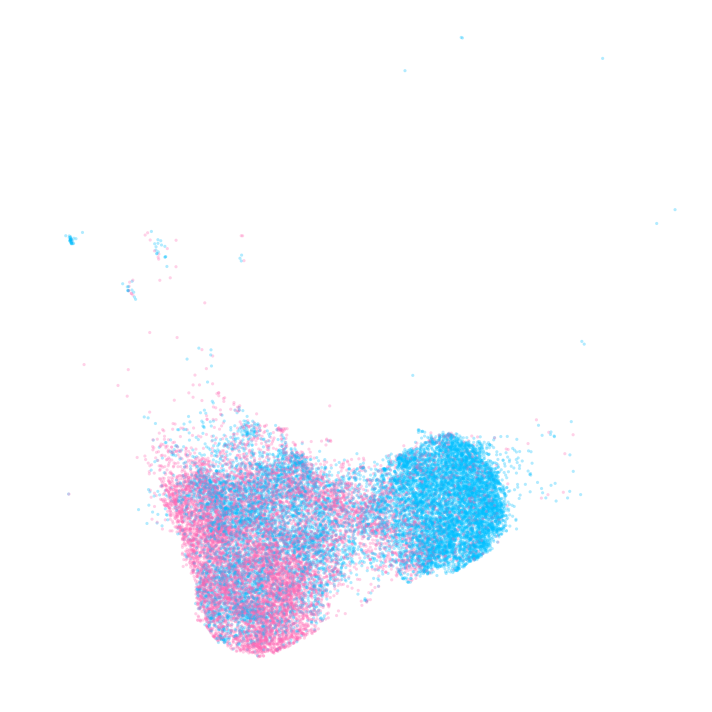

In [16]:
from matplotlib.colors import LinearSegmentedColormap
from numpy import random
cm = LinearSegmentedColormap.from_list(
        'my_cm', ['deepskyblue','hotpink'], N=2)

fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(latent_u[clusters!=11, 0], latent_u[clusters!=11, 1],color = 'lightgray',edgecolors='none',alpha=1)
idx = np.repeat(True,np.sum(isCD4))
order = np.arange(sum(idx))
random.shuffle(order)
ax.scatter(latent_u[idx, 0][order], latent_u[idx, 1][order],c=isCSF[idx][order],cmap=cm,edgecolors='none',alpha=0.3,s=10)    
plt.axis("off")
plt.tight_layout()
# plt.show()
plt.savefig(save_path + 'figures/SupFigure7/CD4.isCSF.png',dpi=300)
# plt.savefig('../CSF/figures/allclusters.legend.pdf')

In [21]:
tissue=np.concatenate([np.repeat('CSF',8),np.repeat('PBMC',10)])
states=np.asarray(['MS','MS','MS','MS','control','control','control','control',
                   'MS','MS','MS','MS','MS','control','control','control','control','control'])

samplenames = [x+'_'+states[i] for i,x in enumerate(tissue)]
samplenames = np.asarray(samplenames)

In [22]:
total = np.sum(celltype_counts,0)

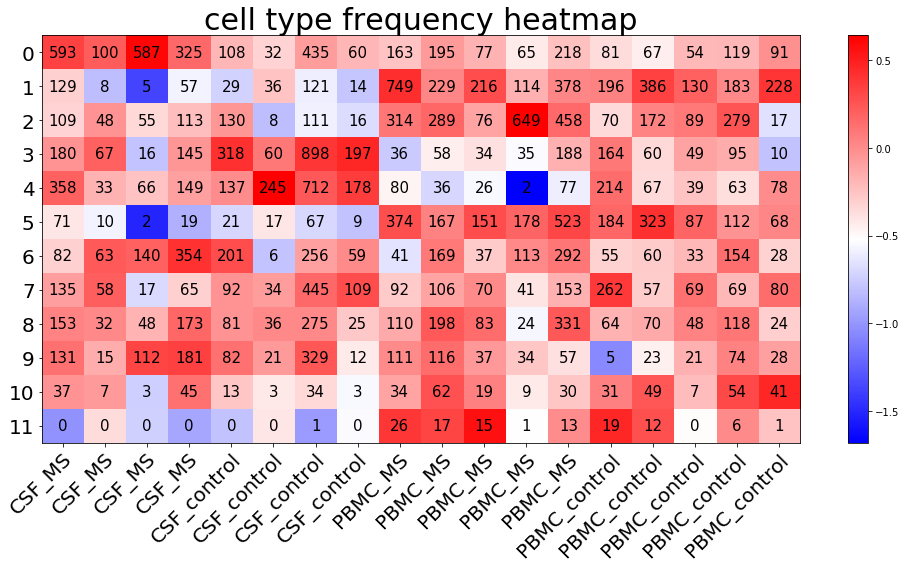

In [23]:
Heatmap(celltype_counts.T, total,
        samplenames,celltype_ordered,
        'cell type frequency heatmap','SupFigure7/CD4.freq.heatmap.pdf',width=14)


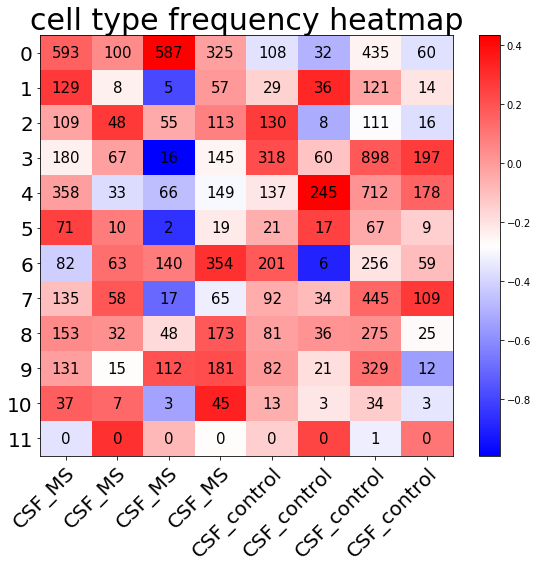

In [24]:
Heatmap(celltype_counts.T[tissue=='CSF',:], total[tissue=='CSF'],
        samplenames[tissue=='CSF'],celltype_ordered,
        'cell type frequency heatmap','SupFigure7/CD4.CSF.freq.heatmap.pdf',width=8)


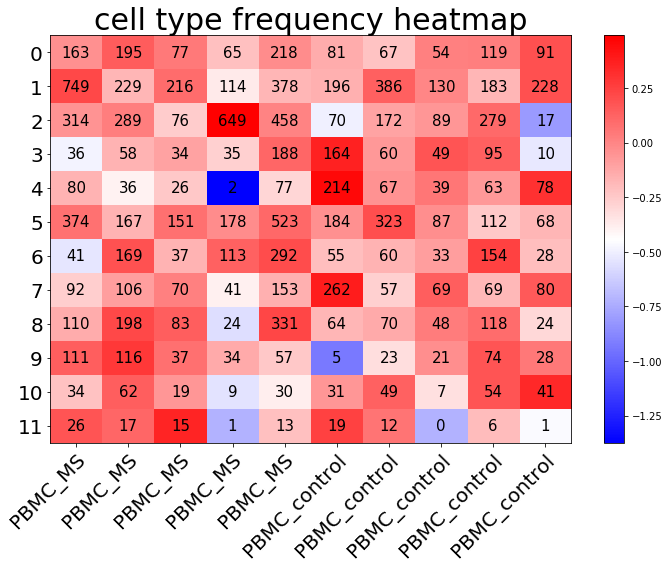

In [25]:
Heatmap(celltype_counts.T[tissue=='PBMC',:], total[tissue=='PBMC'],
        samplenames[tissue=='PBMC'], celltype_ordered,
        'cell type frequency heatmap','SupFigure7/CD4.PBMC.freq.heatmap.pdf',width=10)


In [26]:
grouped_count= np.asarray([np.sum(celltype_counts.T[samplenames==name,:],axis=0) for name in np.unique(samplenames)])

In [27]:
grouped_total= np.asarray([np.sum(total[samplenames==name]) for name in np.unique(samplenames)])

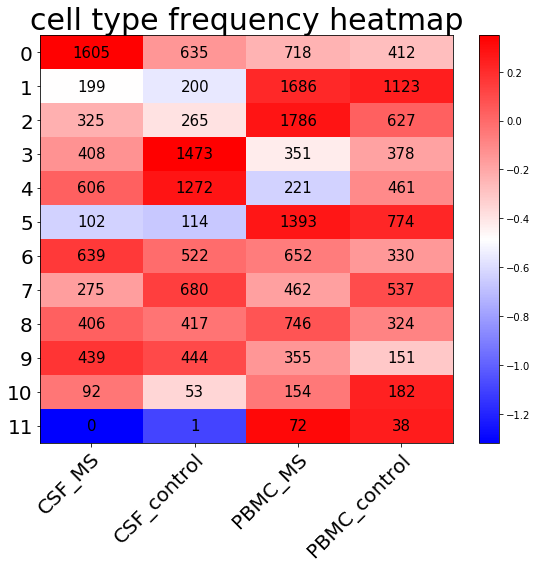

In [28]:
Heatmap(grouped_count, grouped_total,
        np.unique(samplenames),celltype_ordered,
        'cell type frequency heatmap','SupFigure7/CD4.grouped.freq.heatmap.pdf',width=8)

In [29]:
VisionScore = pd.read_csv('../CSF/signatures/sigScore.all.csv')

In [32]:
sigs =  ['GSE11057_NAIVE_VS_MEMORY_CD4_TCELL' , 'GSE3982_EFF_MEMORY_VS_CENT_MEMORY_CD4_TCELL']
VisionScore = VisionScore[sigs]

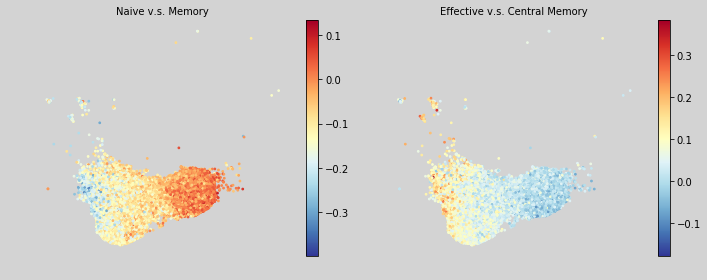

In [38]:
fig, ax = plt.subplots(figsize=(10, 4),facecolor='lightgray')
names = ['Naive v.s. Memory', 'Effective v.s. Central Memory']
for i,x in enumerate(sigs):
    plt.subplot(1,2,i+1)
    plt.scatter(latent_u[:, 0], latent_u[:, 1],c=(np.asarray(VisionScore[x])),
                cmap='RdYlBu_r',s=3)
    plt.colorbar()
    plt.title(names[i],fontsize=10)
    plt.axis("off")
    plt.tight_layout()

plt.savefig(save_path+'figures/SupFigure7/mem_sig.pdf')


In [6]:
len(celllabels)

65326

In [8]:
celllabels = np.load('../CSF/Notebooks/meta/CD4.clusters.npy')
# celllabels = celllabels[isCD4]

In [12]:
colors = ['#a30000', '#ff6666', '#ff9d00', '#c3ff00', '#3a470e', '#34a321', '#2198a3', '#001547', '#3400a3', '#9666ff', '#470e28', '#a3416d']
mean_pos = []
for i,x in enumerate(np.unique(celllabels)):
    idx = (celllabels==x)
    mean_pos.append([np.median(latentCD4[idx,0]),np.median(latentCD4[idx,1])])


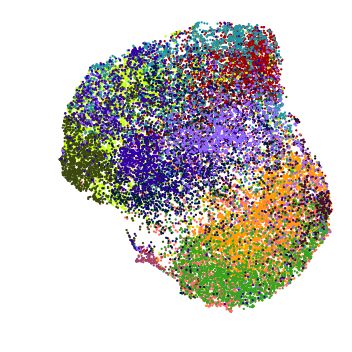

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
for i,x in enumerate(np.unique(celllabels)):
    idx = (celllabels==x)
    ax.scatter(latentCD4[idx, 0], latentCD4[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
        
plt.axis("off")
plt.tight_layout()
plt.show()